In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

df = pd.read_csv("C:\\Users\\harvi\\Desktop\\richardson-weather-analysis\\data\\richardson weather from 1-2020 to 12-2024.csv", parse_dates=['DATE'])

In [3]:
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

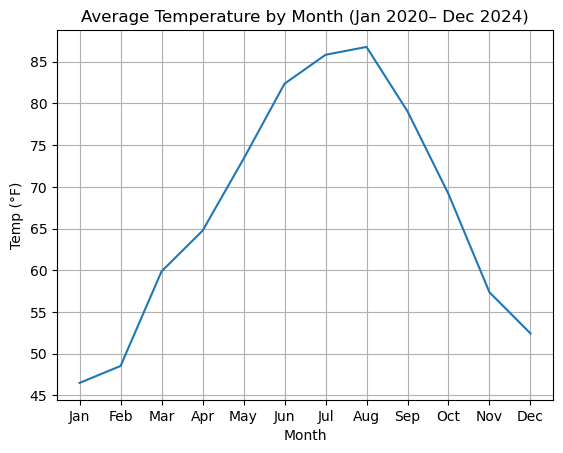

In [4]:
df['TAVG'] = (df['TMAX'] + df['TMIN']) / 2

monthly_avg = df.groupby('month').agg({
    'TAVG': 'mean',
    'PRCP': 'mean'
}).reset_index()
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: calendar.month_abbr[x])

sns.lineplot(data=monthly_avg, x='month_name', y='TAVG')
plt.title('Average Temperature by Month (Jan 2020– Dec 2024)')
plt.ylabel('Temp (°F)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


In [5]:
# On average, the hottest month in Richardson is August and the coldest month is January.

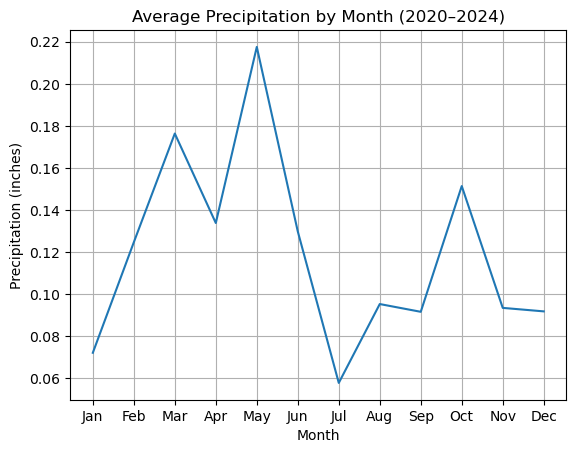

In [6]:
sns.lineplot(data=monthly_avg, x='month_name', y='PRCP')
plt.title('Average Precipitation by Month (2020–2024)')
plt.ylabel('Precipitation (inches)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

In [7]:
# On average, the driest month in Richardson is July, and the wettest month is May.

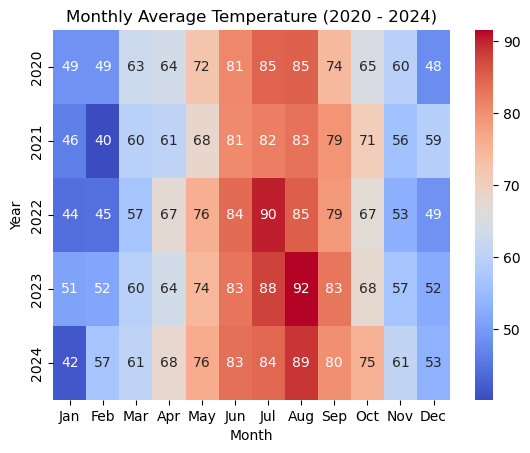

In [8]:
import calendar

# Create the pivot table
pivot_temp = df.pivot_table(index='year', columns='month_name', values='TAVG', aggfunc='mean')

# Reorder columns to calendar order
month_order = list(calendar.month_abbr)[1:]  # ['Jan', 'Feb', ..., 'Dec']
pivot_temp = pivot_temp[month_order]

# Plot
sns.heatmap(pivot_temp, cmap='coolwarm', annot=True)
plt.title("Monthly Average Temperature (2020 - 2024)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

In [9]:
# Februrary of 2021 had the coldest temperature in this heatmap. This skew is due to the events of Winter Storm Uri.
# August of 2023 had the hottest temperature. 2023 did have an exceptionally hot summer, explaining why this skew is present.
# Summer temperatures have rose for the 2022 and 2023 season, but slightly went down for the 2024 season.
# Apart from Winter Storm Uri, winter temperatures have remained consistent.

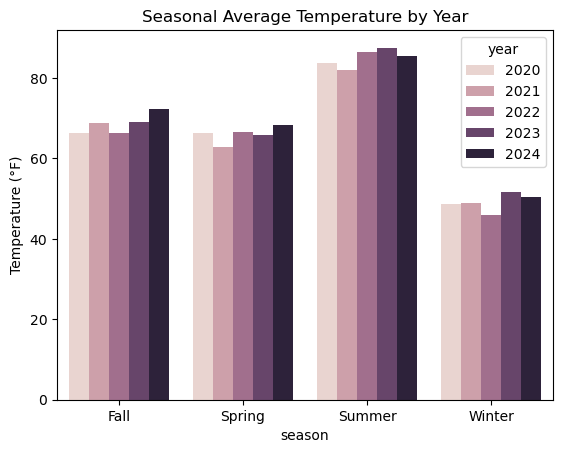

In [10]:
seasonal = df.groupby(['year', 'season']).agg({
    'TAVG': 'mean',
    'PRCP': 'sum'
}).reset_index()

sns.barplot(data=seasonal, x='season', y='TAVG', hue='year')
plt.title('Seasonal Average Temperature by Year')
plt.ylabel('Temperature (°F)')
plt.show()

In [18]:
# The fall and spring temperatures have had an increasing trend.
# However, while the summer temperatures rose for 2022 and 2023, it went slightly down in 2024, as explained earlier.
# The temperatures have not been increasing consistently for all seasons in Richardson, there are some ups and downs.
# Since the temperatures overall are going up, the data lets us examine the effects of global warming.